# UCI Kitsune Network Attack dataset

In [82]:
import pandas as pd
import numpy as np
import os
from pathlib import Path
from config import data_raw_folder, data_processed_folder
from timeeval import Datasets
import matplotlib.pyplot as plt

In [83]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

In [84]:
dataset_collection_name = "Kitsune"
source_folder = Path(data_raw_folder) / "UCI ML Repository/Kitsune Network Attack"
target_folder = Path(data_processed_folder)

print(f"Looking for source datasets in {source_folder.absolute()} and\nsaving processed datasets in {target_folder.absolute()}")

Looking for source datasets in /home/projects/akita/data/benchmark-data/data-raw/UCI ML Repository/Kitsune Network Attack and
saving processed datasets in /home/projects/akita/data/benchmark-data/data-processed


In [85]:
train_type = "unsupervised"
train_is_normal = False
input_type = "multivariate"
datetime_index = False
dataset_type = "real"

# create target directory
dataset_subfolder = os.path.join(input_type, dataset_collection_name)
target_subfolder = os.path.join(target_folder, dataset_subfolder)
try:
    os.makedirs(target_subfolder)
    print(f"Created directories {target_subfolder}")
except FileExistsError:
    print(f"Directories {target_subfolder} already exist")
    pass

dm = Datasets(target_folder)

datasets= [
    "active_wiretap",
    "arp_mitm",
    "fuzzing",
    "mirai",
    "os_scan",
    "ssdp_flood",
    "ssl_renegotiation",
    "syn_dos",
    "video_injection"
]

Directories /home/projects/akita/data/benchmark-data/data-processed/multivariate/Kitsune already exist


In [86]:
for dataset_name in datasets:
    print(f"Processing dataset {dataset_name}")
    data_file = list((source_folder / dataset_name).glob("*_dataset.csv"))[0]
    label_file = list((source_folder / dataset_name).glob("*_labels.csv"))[0]
    
    # transform dataset
    print("  loading data file")
    df = pd.read_csv(data_file, header=None)
    df.columns = [f"value-{c}" for c in df.columns]
    print("  loading label file")
    df_label = pd.read_csv(label_file, usecols=[1])
    df_label.columns = ["is_anomaly"]
    df["is_anomaly"] = df_label["is_anomaly"]
    del df_label
    df.index.name = "timestamp"
    
    filename = f"{dataset_name}.test.csv"
    path = os.path.join(dataset_subfolder, filename)
    target_filepath = os.path.join(target_subfolder, filename)
    dataset_length = len(df)
    print("  writing dataset")
    df.to_csv(target_filepath, index=True)
    print(f"Processed dataset {source_folder / dataset_name} -> {target_filepath}")

    # save metadata
    dm.add_dataset((dataset_collection_name, dataset_name),
        train_path = None,
        test_path = path,
        dataset_type = dataset_type,
        datetime_index = datetime_index,
        split_at = None,
        train_type = train_type,
        train_is_normal = train_is_normal,
        input_type = input_type,
        dataset_length = dataset_length
    )

dm.save()

Processing dataset active_wiretap
  loading data file
  loading label file
  writing dataset
Processed dataset /home/projects/akita/data/benchmark-data/data-raw/UCI ML Repository/Kitsune Network Attack/active_wiretap -> /home/projects/akita/data/benchmark-data/data-processed/multivariate/Kitsune/active_wiretap.test.csv
Processing dataset arp_mitm
  loading data file
  loading label file
  writing dataset
Processed dataset /home/projects/akita/data/benchmark-data/data-raw/UCI ML Repository/Kitsune Network Attack/arp_mitm -> /home/projects/akita/data/benchmark-data/data-processed/multivariate/Kitsune/arp_mitm.test.csv
Processing dataset fuzzing
  loading data file
  loading label file
  writing dataset
Processed dataset /home/projects/akita/data/benchmark-data/data-raw/UCI ML Repository/Kitsune Network Attack/fuzzing -> /home/projects/akita/data/benchmark-data/data-processed/multivariate/Kitsune/fuzzing.test.csv
Processing dataset mirai
  loading data file
  loading label file
  writing 

In [87]:
dm.refresh()
dm.df().loc[(slice(dataset_collection_name,dataset_collection_name), slice(None))]

train_path  \
collection_name dataset_name                   
Kitsune         active_wiretap           NaN   
                arp_mitm                 NaN   
                fuzzing                  NaN   
                mirai                    NaN   
                os_scan                  NaN   
                ssdp_flood               NaN   
                ssl_renegotiation        NaN   
                syn_dos                  NaN   
                video_injection          NaN   

                                                                         test_path  \
collection_name dataset_name                                                         
Kitsune         active_wiretap        multivariate/Kitsune/active_wiretap.test.csv   
                arp_mitm                    multivariate/Kitsune/arp_mitm.test.csv   
                fuzzing                      multivariate/Kitsune/fuzzing.test.csv   
                mirai                          multivariate/Kitsune/mirai.test.csv   
                os_scan                      multivariate/Kitsune/os_scan.test.csv   
                ssdp_flood                multivariate/Kitsune/ssdp_flood.test.csv   
                ssl_renegotiation  multivariate/Kitsune/ssl_renegotiation.test.csv   
                syn_dos                      multivariate/Kitsune/syn_dos.test.csv   
                video_injection      multivariate/Kitsune/video_injection.test.csv   

                                  dataset_type  datetime_index  split_at  \
collection_name dataset_name                                               
Kitsune         active_wiretap            real           False       NaN   
                arp_mitm                  real           False       NaN   
                fuzzing                   real           False       NaN   
                mirai                     real           False       NaN   
                os_scan                   real           False       NaN   
                ssdp_flood                real           False       NaN   
                ssl_renegotiation         real           False       NaN   
                syn_dos                   real           False       NaN   
                video_injection           real           False       NaN   

                                     train_type  train_is_normal  \
collection_name dataset_name                                       
Kitsune         active_wiretap     unsupervised            False   
                arp_mitm           unsupervised            False   
                fuzzing            unsupervised            False   
                mirai              unsupervised            False   
                os_scan            unsupervised            False   
                ssdp_flood         unsupervised            False   
                ssl_renegotiation  unsupervised            False   
                syn_dos            unsupervised            False   
                video_injection    unsupervised            False   

                                     input_type   length  
collection_name dataset_name                              
Kitsune         active_wiretap     multivariate  2278689  
                arp_mitm           multivariate  2504267  
                fuzzing            multivariate  2244139  
                mirai              multivariate   764137  
                os_scan            multivariate  1697851  
                ssdp_flood         multivariate  4077266  
                ssl_renegotiation  multivariate  2207571  
                syn_dos            multivariate  2771276  
                video_injection    multivariate  2472401

## Experimentation

Datasets:

- ARP MitM: ARP Man-in-the-Middle attack between a camera & DVR
- SSDP Flood: SSDP Flooding Attack against the DVR Server
- OS Scan: NMAP OS Scan of the subnet
- Active Wiretap: A bridged Raspberry Pi placed between all cameras and the DVR server
- SYN Flooding: A SYN DoS attack against a camera
- Fuzzing: A Fuzzing Attack against DVR's webserver's cgi
- Video Injection: A MitM video content injection attack into a camera's live stream
- SSL Renegotiation: A DoS attack against an SSL enabled camera
- Mirai: The initial infection and propagation of the Mirai malware (**on a diffrent IoT network**)


In [5]:
datasets= [
    "active_wiretap",
    "arp_mitm",
    "fuzzing",
    "mirai",
    "os_scan",
    "ssdp_flood",
    "ssl_renegotiation",
    "syn_dos",
    "video_injection"
]
[source_folder / d for d in datasets]

[PosixPath('/home/projects/akita/data/benchmark-data/data-raw/UCI ML Repository/Kitsune Network Attack/active_wiretap'),
 PosixPath('/home/projects/akita/data/benchmark-data/data-raw/UCI ML Repository/Kitsune Network Attack/arp_mitm'),
 PosixPath('/home/projects/akita/data/benchmark-data/data-raw/UCI ML Repository/Kitsune Network Attack/fuzzing'),
 PosixPath('/home/projects/akita/data/benchmark-data/data-raw/UCI ML Repository/Kitsune Network Attack/mirai'),
 PosixPath('/home/projects/akita/data/benchmark-data/data-raw/UCI ML Repository/Kitsune Network Attack/os_scan'),
 PosixPath('/home/projects/akita/data/benchmark-data/data-raw/UCI ML Repository/Kitsune Network Attack/ssdp_flood'),
 PosixPath('/home/projects/akita/data/benchmark-data/data-raw/UCI ML Repository/Kitsune Network Attack/ssl_renegotiation'),
 PosixPath('/home/projects/akita/data/benchmark-data/data-raw/UCI ML Repository/Kitsune Network Attack/syn_dos'),
 PosixPath('/home/projects/akita/data/benchmark-data/data-raw/UCI ML 

In [14]:
data_file = list((source_folder / "os_scan").glob("*_dataset.csv"))[0]
label_file = list((source_folder / "os_scan").glob("*_labels.csv"))[0]

In [72]:
df = pd.read_csv(data_file, header=None)
df.columns = [f"value-{c}" for c in df.columns]

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697851 entries, 0 to 1697850
Columns: 116 entries, value-0 to value-is_anomaly
dtypes: float64(115), int64(1)
memory usage: 1.5 GB


In [73]:
df_label = pd.read_csv(label_file, usecols=[1])
df_label.columns = ["is_anomaly"]

In [78]:
df_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697851 entries, 0 to 1697850
Data columns (total 1 columns):
 #   Column      Dtype
---  ------      -----
 0   is_anomaly  int64
dtypes: int64(1)
memory usage: 13.0 MB


In [81]:
df["is_anomaly"] = df_label["is_anomaly"]
df

,value-0,value-1,value-2,value-3,value-4,value-5,value-6,value-7,value-8,value-9,...,value-107,value-108,value-109,value-110,value-111,value-112,value-113,value-114,value-is_anomaly,is_anomaly
0,1.000000,1294.000000,0.000000e+00,1.000000,1294.000000,0.000000e+00,1.000000,1294.000000,0.000000e+00,1.000000,...,0.000000e+00,1.000000,1294.000000,0.000000,1294.000000,0.000000e+00,0.000000e+00,0.000000e+00,0,0
1,1.999871,1294.000000,2.328306e-10,1.999923,1294.000000,6.984919e-10,1.999974,1294.000000,0.000000e+00,1.999997,...,0.000000e+00,2.000000,1294.000000,0.000015,1294.000000,2.328306e-10,0.000000e+00,0.000000e+00,0,0
2,2.999324,1294.000000,0.000000e+00,2.999594,1294.000000,2.328306e-10,2.999865,1294.000000,2.328306e-10,2.999986,...,0.000000e+00,2.999999,1294.000000,0.000031,1294.000000,9.313226e-10,0.000000e+00,0.000000e+00,0,0
3,3.999272,1294.000000,2.328306e-10,3.999563,1294.000000,9.313226e-10,3.999854,1294.000000,2.328306e-10,3.999985,...,0.000000e+00,3.999999,1294.000000,0.000026,1294.000000,6.984919e-10,0.000000e+00,0.000000e+00,0,0
4,4.997597,1294.000000,2.328306e-10,4.998558,1294.000000,9.313226e-10,4.999519,1294.000000,2.328306e-10,4.999952,...,0.000000e+00,4.999995,1294.000000,0.000026,1294.000000,6.984919e-10,0.000000e+00,0.000000e+00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1697846,55.113544,1255.595820,2.411756e+04,94.149478,1248.122129,3.155234e+04,296.671341,1240.619257,4.002142e+04,3048.476828,...,8.220905e-09,30554.773785,1239.968489,203.039849,1241.419290,4.122518e+04,-3.829889e-12,-9.323921e-09,0,0
1697847,56.089276,1256.280518,2.371340e+04,95.124602,1248.604421,3.124254e+04,297.645211,1240.798601,3.989650e+04,3049.449976,...,8.214223e-09,30555.746871,1239.970257,203.036762,1241.421056,4.122393e+04,-3.829852e-12,-9.323973e-09,0,0
1697848,24.218101,60.000000,9.094947e-13,41.684124,60.000000,1.818989e-12,132.075127,60.000000,4.092726e-12,1360.879336,...,8.008362e-09,13525.849403,60.000000,0.000002,1241.421056,4.122393e+04,-3.829835e-12,-1.057234e-08,0,0
1697849,57.082093,1256.941311,2.332246e+04,96.117293,1249.076715,3.093871e+04,298.637587,1240.976748,3.977235e+04,3050.442165,...,8.001688e-09,30556.739044,1239.972026,203.033675,1241.422823,4.122267e+04,-3.829817e-12,-1.057245e-08,0,0


## Plotting

<AxesSubplot:>

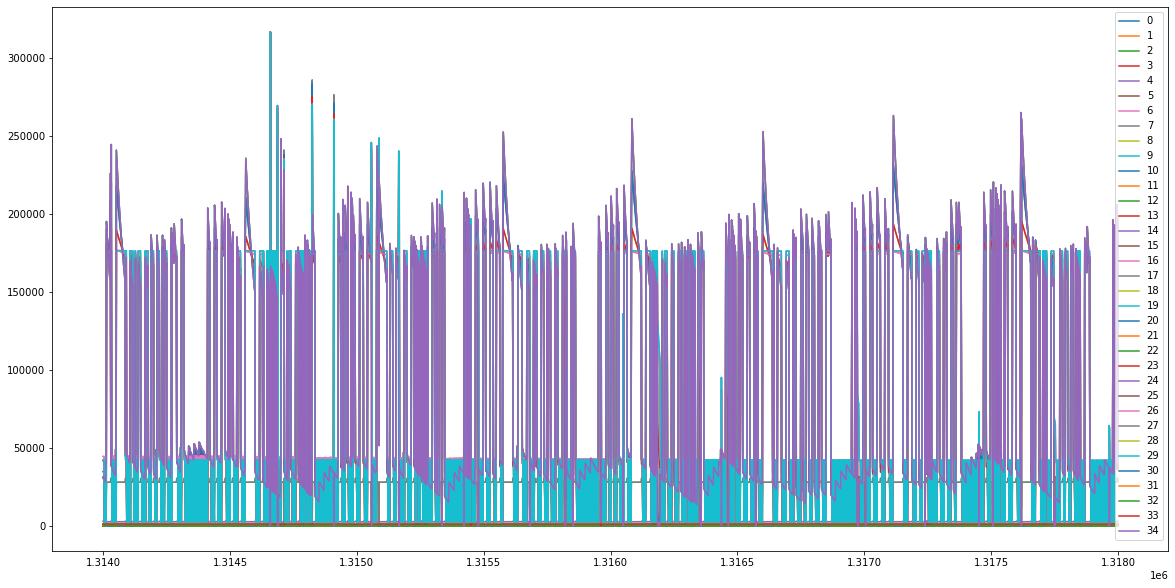

In [66]:
df.iloc[1314000:1318000].plot(y=range(0, 35))

<AxesSubplot:>

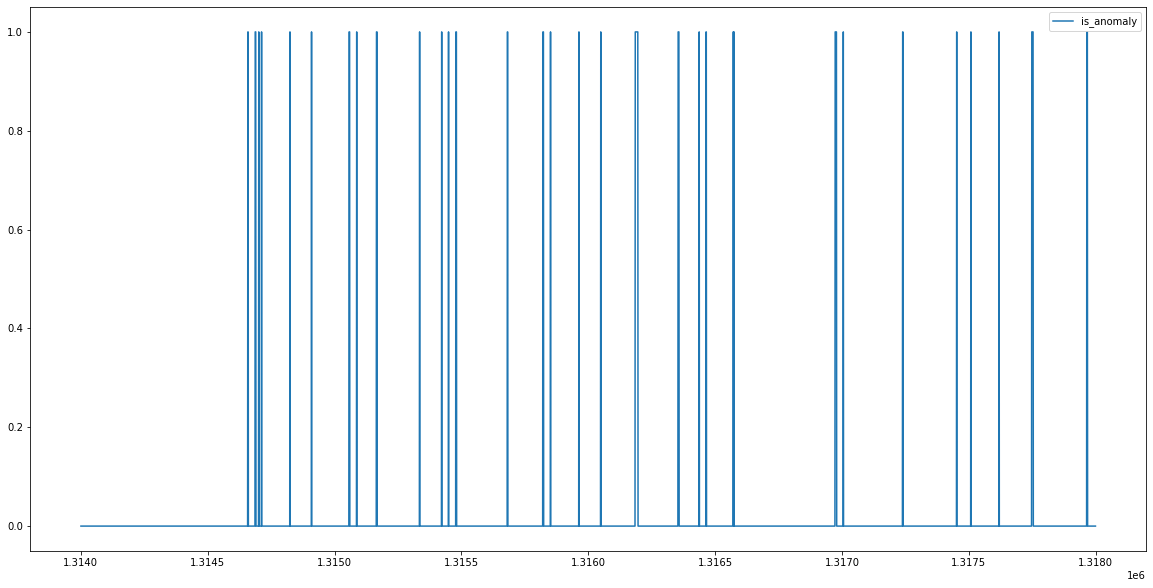

In [68]:
df_label.iloc[1314000:1318000].plot()

<AxesSubplot:>

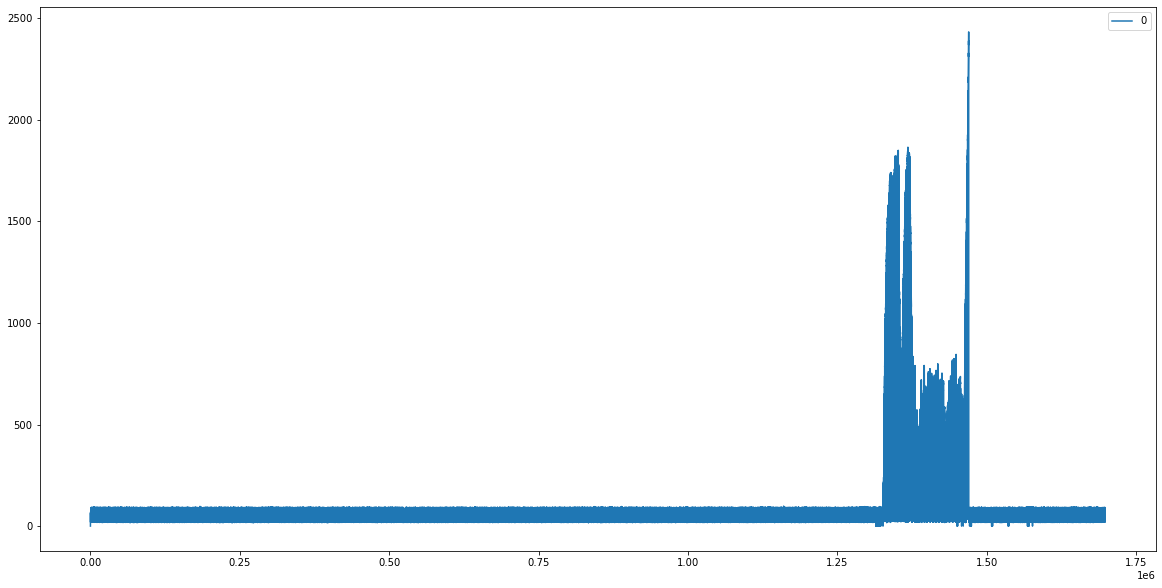

In [71]:
df.plot(y=[0])

<AxesSubplot:>

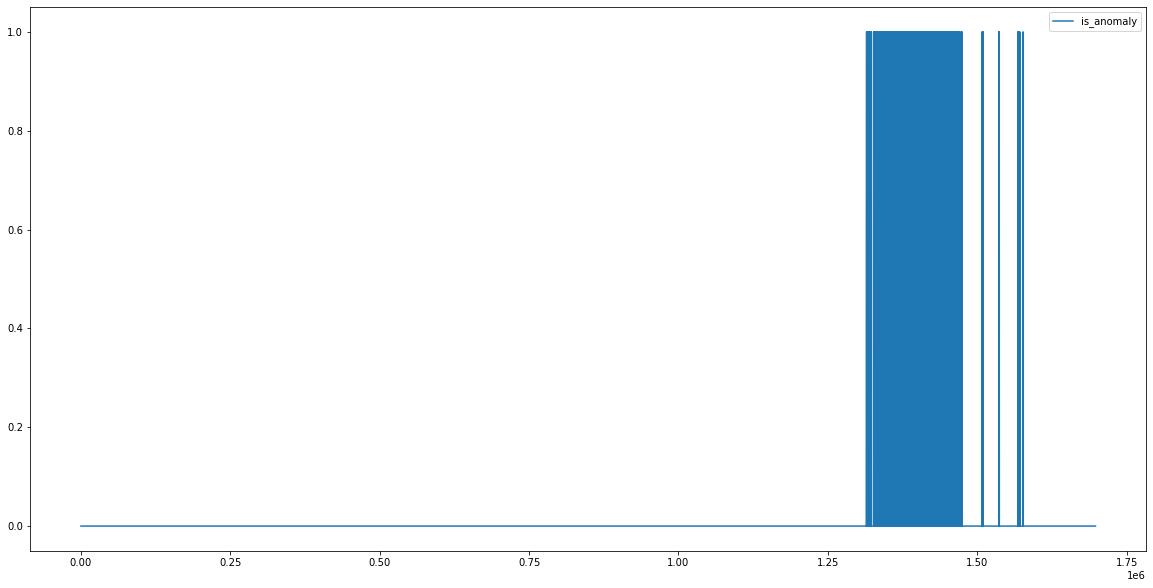

In [65]:
df_label.plot()